<a href="https://colab.research.google.com/github/Fazloussatter/Financial-Statement-and-Investment-Recommendations-in-Python-using-yahooquery/blob/main/Financial_Statement_and_Investment_Recommendations_in_Python_using_yahooquery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing essential packages and libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime as dt
import time
%pip install yahooquery
from yahooquery import ticker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.8 MB/s eta 0:00:00


# Showing the maximum rows and columns

In [3]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

#Adding the ticker symbol

In [4]:
symbol="AMZN"
stock=ticker.Ticker(symbol)
stock.balance_sheet()

,asOfDate,periodType,currencyCode,AccountsPayable,AccountsReceivable,AccumulatedDepreciation,AdditionalPaidInCapital,AllowanceForDoubtfulAccountsReceivable,CapitalLeaseObligations,CapitalStock,CashAndCashEquivalents,CashCashEquivalentsAndShortTermInvestments,CommonStock,CommonStockEquity,ConstructionInProgress,CurrentAccruedExpenses,CurrentAssets,CurrentDeferredLiabilities,CurrentDeferredRevenue,CurrentLiabilities,FinishedGoods,GainsLossesNotAffectingRetainedEarnings,Goodwill,GoodwillAndOtherIntangibleAssets,GrossAccountsReceivable,GrossPPE,InventoriesAdjustmentsAllowances,Inventory,InvestedCapital,LandAndImprovements,LongTermCapitalLeaseObligation,LongTermDebt,LongTermDebtAndCapitalLeaseObligation,MachineryFurnitureEquipment,NetDebt,NetPPE,NetTangibleAssets,OrdinarySharesNumber,OtherEquityAdjustments,OtherIntangibleAssets,OtherInventories,OtherNonCurrentAssets,OtherNonCurrentLiabilities,OtherProperties,OtherShortTermInvestments,Payables,PayablesAndAccruedExpenses,PreferredStock,Properties,Receivables,RetainedEarnings,ShareIssued,StockholdersEquity,TangibleBookValue,TotalAssets,TotalCapitalization,TotalDebt,TotalEquityGrossMinorityInterest,TotalLiabilitiesNetMinorityInterest,TotalNonCurrentAssets,TotalNonCurrentLiabilitiesNetMinorityInterest,TreasurySharesNumber,TreasuryStock,WorkingCapital
symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AMZN,2020-12-31,12M,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379500e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.732400e+10,NaN,NaN,NaN,9.722400e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMZN,2021-12-31,12M,USD,7.866400e+10,3.289100e+10,-7.851900e+10,5.543700e+10,-1.100000e+09,6.765100e+10,106000000.0,3.622000e+10,9.604900e+10,106000000.0,1.382450e+11,2.489500e+10,5.177500e+10,1.615800e+11,1.182700e+10,1.182700e+10,1.422660e+11,3.264000e+10,-1.376000e+09,1.537100e+10,2.047800e+10,3.399100e+10,2.948820e+11,-2.600000e+09,3.264000e+10,1.869890e+11,8.110400e+10,6.765100e+10,4.874400e+10,1.163950e+11,1.286830e+11,1.252400e+10,2.163630e+11,1.177670e+11,1.018000e+10,-1.376000e+09,5.107000e+09,3.524000e+10,2.212800e+10,2.364300e+10,1.888830e+11,5.982900e+10,7.866400e+10,1.304390e+11,0.0,8.110400e+10,3.289100e+10,8.591500e+10,1.064000e+10,1.382450e+11,1.177670e+11,4.205490e+11,1.869890e+11,1.163950e+11,1.382450e+11,2.823040e+11,2.589690e+11,1.400380e+11,460000000.0,1.837000e+09,1.931400e+10
AMZN,2022-12-31,12M,USD,7.960000e+10,4.236000e+10,-9.701500e+10,7.506600e+10,-1.400000e+09,7.296800e+10,108000000.0,5.388800e+10,7.002600e+10,108000000.0,1.460430e+11,3.002000e+10,6.256600e+10,1.467910e+11,1.322700e+10,1.322700e+10,1.553930e+11,NaN,-4.487000e+09,2.028800e+10,2.638500e+10,4.376000e+10,3.498530e+11,-2.800000e+09,3.440500e+10,2.131930e+11,9.165000e+10,7.296800e+10,6.715000e+10,1.401180e+11,NaN,1.326200e+10,2.528380e+11,1.196580e+11,1.024200e+10,-4.487000e+09,6.097000e+09,3.720500e+10,3.666100e+10,2.112100e+10,2.281830e+11,1.613800e+10,7.960000e+10,1.421660e+11,0.0,9.165000e+10,4.236000e+10,8.319300e+10,1.075700e+10,1.460430e+11,1.196580e+11,4.626750e+11,2.131930e+11,1.401180e+11,1.460430e+11,3.166320e+11,3.158840e+11,1.612390e+11,515000000.0,7.837000e+09,-8.602000e+09
AMZN,2023-12-31,12M,USD,8.498100e+10,5.225300e+10,-1.201110e+11,9.902500e+10,-1.700000e+09,7.729700e+10,109000000.0,7.338700e+10,8.678000e+10,109000000.0,2.018750e+11,2.884000e+10,6.470900e+10,1.723510e+11,1.522700e+10,1.522700e+10,1.649170e+11,NaN,-3.040000e+09,2.278900e+10,3.047600e+10,5.395300e+10,3.968010e+11,-3.000000e+09,3.331800e+10,2.601890e+11,1.052930e+11,7.729700e+10,5.831400e+10,1.356110e+11,NaN,NaN,2.766900e+11,1.713990e+11,1.038300e+10,-3.040000e+09,7.687000e+09,3.631800e+10,4.833700e+10,2.545100e+10,2.626680e+11,1.339300e+10,8.498100e+10,1.496900e+11,0.0,1.052930e+11,5.225300e+10,1.136180e+11,1.089800e+10,2.018750e+11,1.713990e+11,5.278540e+11,2.601890e+11,1.356110e+11,2.018750e+11,3.259790e+11,

#Data Cleaning

In [5]:

df_balance=pd.DataFrame(stock.balance_sheet())
df_balance["asofDate"]=pd.to_datetime(df_balance["asOfDate"])
df_balance=df_balance.set_index("asofDate")
currency=df_balance["currencyCode"].iloc[0]
balance_period=df_balance["periodType"].iloc[0]
df_balance=df_balance.iloc[:,2:]
df_balance

,currencyCode,AccountsPayable,AccountsReceivable,AccumulatedDepreciation,AdditionalPaidInCapital,AllowanceForDoubtfulAccountsReceivable,CapitalLeaseObligations,CapitalStock,CashAndCashEquivalents,CashCashEquivalentsAndShortTermInvestments,CommonStock,CommonStockEquity,ConstructionInProgress,CurrentAccruedExpenses,CurrentAssets,CurrentDeferredLiabilities,CurrentDeferredRevenue,CurrentLiabilities,FinishedGoods,GainsLossesNotAffectingRetainedEarnings,Goodwill,GoodwillAndOtherIntangibleAssets,GrossAccountsReceivable,GrossPPE,InventoriesAdjustmentsAllowances,Inventory,InvestedCapital,LandAndImprovements,LongTermCapitalLeaseObligation,LongTermDebt,LongTermDebtAndCapitalLeaseObligation,MachineryFurnitureEquipment,NetDebt,NetPPE,NetTangibleAssets,OrdinarySharesNumber,OtherEquityAdjustments,OtherIntangibleAssets,OtherInventories,OtherNonCurrentAssets,OtherNonCurrentLiabilities,OtherProperties,OtherShortTermInvestments,Payables,PayablesAndAccruedExpenses,PreferredStock,Properties,Receivables,RetainedEarnings,ShareIssued,StockholdersEquity,TangibleBookValue,TotalAssets,TotalCapitalization,TotalDebt,TotalEquityGrossMinorityInterest,TotalLiabilitiesNetMinorityInterest,TotalNonCurrentAssets,TotalNonCurrentLiabilitiesNetMinorityInterest,TreasurySharesNumber,TreasuryStock,WorkingCapital
asofDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-31,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379500e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.732400e+10,NaN,NaN,NaN,9.722400e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-31,USD,7.866400e+10,3.289100e+10,-7.851900e+10,5.543700e+10,-1.100000e+09,6.765100e+10,106000000.0,3.622000e+10,9.604900e+10,106000000.0,1.382450e+11,2.489500e+10,5.177500e+10,1.615800e+11,1.182700e+10,1.182700e+10,1.422660e+11,3.264000e+10,-1.376000e+09,1.537100e+10,2.047800e+10,3.399100e+10,2.948820e+11,-2.600000e+09,3.264000e+10,1.869890e+11,8.110400e+10,6.765100e+10,4.874400e+10,1.163950e+11,1.286830e+11,1.252400e+10,2.163630e+11,1.177670e+11,1.018000e+10,-1.376000e+09,5.107000e+09,3.524000e+10,2.212800e+10,2.364300e+10,1.888830e+11,5.982900e+10,7.866400e+10,1.304390e+11,0.0,8.110400e+10,3.289100e+10,8.591500e+10,1.064000e+10,1.382450e+11,1.177670e+11,4.205490e+11,1.869890e+11,1.163950e+11,1.382450e+11,2.823040e+11,2.589690e+11,1.400380e+11,460000000.0,1.837000e+09,1.931400e+10
2022-12-31,USD,7.960000e+10,4.236000e+10,-9.701500e+10,7.506600e+10,-1.400000e+09,7.296800e+10,108000000.0,5.388800e+10,7.002600e+10,108000000.0,1.460430e+11,3.002000e+10,6.256600e+10,1.467910e+11,1.322700e+10,1.322700e+10,1.553930e+11,NaN,-4.487000e+09,2.028800e+10,2.638500e+10,4.376000e+10,3.498530e+11,-2.800000e+09,3.440500e+10,2.131930e+11,9.165000e+10,7.296800e+10,6.715000e+10,1.401180e+11,NaN,1.326200e+10,2.528380e+11,1.196580e+11,1.024200e+10,-4.487000e+09,6.097000e+09,3.720500e+10,3.666100e+10,2.112100e+10,2.281830e+11,1.613800e+10,7.960000e+10,1.421660e+11,0.0,9.165000e+10,4.236000e+10,8.319300e+10,1.075700e+10,1.460430e+11,1.196580e+11,4.626750e+11,2.131930e+11,1.401180e+11,1.460430e+11,3.166320e+11,3.158840e+11,1.612390e+11,515000000.0,7.837000e+09,-8.602000e+09
2023-12-31,USD,8.498100e+10,5.225300e+10,-1.201110e+11,9.902500e+10,-1.700000e+09,7.729700e+10,109000000.0,7.338700e+10,8.678000e+10,109000000.0,2.018750e+11,2.884000e+10,6.470900e+10,1.723510e+11,1.522700e+10,1.522700e+10,1.649170e+11,NaN,-3.040000e+09,2.278900e+10,3.047600e+10,5.395300e+10,3.968010e+11,-3.000000e+09,3.331800e+10,2.601890e+11,1.052930e+11,7.729700e+10,5.831400e+10,1.356110e+11,NaN,NaN,2.766900e+11,1.713990e+11,1.038300e+10,-3.040000e+09,7.687000e+09,3.631800e+10,4.833700e+10,2.545100e+10,2.626680e+11,1.339300e+10,8.498100e+10,1.496900e+11,0.0,1.052930e+11,5.225300e+10,1.136180e+11,1.089800e+10,2.018750e+11,1.713990e+11,5.278540e+11,2.601890e+11,1.356110e+11,2.018750e+11,3.259790e+11,3.555030e+11,1.610620e+11,515000000.0,7.837000e+09,7.434

#Cleaning null values

In [6]:
df_balance_cleaned=pd.DataFrame(stock.balance_sheet())
df_balance_cleaned["asofDate"]=pd.to_datetime(df_balance_cleaned["asOfDate"])
df_balance_cleaned=df_balance_cleaned.set_index("asofDate")
currency=df_balance_cleaned["currencyCode"].iloc[0]
balance_period=df_balance_cleaned["periodType"].iloc[0]
df_balance_cleaned=df_balance_cleaned.iloc[:,2:]
df_balance_cleaned

,currencyCode,AccountsPayable,AccountsReceivable,AccumulatedDepreciation,AdditionalPaidInCapital,AllowanceForDoubtfulAccountsReceivable,CapitalLeaseObligations,CapitalStock,CashAndCashEquivalents,CashCashEquivalentsAndShortTermInvestments,CommonStock,CommonStockEquity,ConstructionInProgress,CurrentAccruedExpenses,CurrentAssets,CurrentDeferredLiabilities,CurrentDeferredRevenue,CurrentLiabilities,FinishedGoods,GainsLossesNotAffectingRetainedEarnings,Goodwill,GoodwillAndOtherIntangibleAssets,GrossAccountsReceivable,GrossPPE,InventoriesAdjustmentsAllowances,Inventory,InvestedCapital,LandAndImprovements,LongTermCapitalLeaseObligation,LongTermDebt,LongTermDebtAndCapitalLeaseObligation,MachineryFurnitureEquipment,NetDebt,NetPPE,NetTangibleAssets,OrdinarySharesNumber,OtherEquityAdjustments,OtherIntangibleAssets,OtherInventories,OtherNonCurrentAssets,OtherNonCurrentLiabilities,OtherProperties,OtherShortTermInvestments,Payables,PayablesAndAccruedExpenses,PreferredStock,Properties,Receivables,RetainedEarnings,ShareIssued,StockholdersEquity,TangibleBookValue,TotalAssets,TotalCapitalization,TotalDebt,TotalEquityGrossMinorityInterest,TotalLiabilitiesNetMinorityInterest,TotalNonCurrentAssets,TotalNonCurrentLiabilitiesNetMinorityInterest,TreasurySharesNumber,TreasuryStock,WorkingCapital
asofDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-31,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379500e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.732400e+10,NaN,NaN,NaN,9.722400e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-31,USD,7.866400e+10,3.289100e+10,-7.851900e+10,5.543700e+10,-1.100000e+09,6.765100e+10,106000000.0,3.622000e+10,9.604900e+10,106000000.0,1.382450e+11,2.489500e+10,5.177500e+10,1.615800e+11,1.182700e+10,1.182700e+10,1.422660e+11,3.264000e+10,-1.376000e+09,1.537100e+10,2.047800e+10,3.399100e+10,2.948820e+11,-2.600000e+09,3.264000e+10,1.869890e+11,8.110400e+10,6.765100e+10,4.874400e+10,1.163950e+11,1.286830e+11,1.252400e+10,2.163630e+11,1.177670e+11,1.018000e+10,-1.376000e+09,5.107000e+09,3.524000e+10,2.212800e+10,2.364300e+10,1.888830e+11,5.982900e+10,7.866400e+10,1.304390e+11,0.0,8.110400e+10,3.289100e+10,8.591500e+10,1.064000e+10,1.382450e+11,1.177670e+11,4.205490e+11,1.869890e+11,1.163950e+11,1.382450e+11,2.823040e+11,2.589690e+11,1.400380e+11,460000000.0,1.837000e+09,1.931400e+10
2022-12-31,USD,7.960000e+10,4.236000e+10,-9.701500e+10,7.506600e+10,-1.400000e+09,7.296800e+10,108000000.0,5.388800e+10,7.002600e+10,108000000.0,1.460430e+11,3.002000e+10,6.256600e+10,1.467910e+11,1.322700e+10,1.322700e+10,1.553930e+11,NaN,-4.487000e+09,2.028800e+10,2.638500e+10,4.376000e+10,3.498530e+11,-2.800000e+09,3.440500e+10,2.131930e+11,9.165000e+10,7.296800e+10,6.715000e+10,1.401180e+11,NaN,1.326200e+10,2.528380e+11,1.196580e+11,1.024200e+10,-4.487000e+09,6.097000e+09,3.720500e+10,3.666100e+10,2.112100e+10,2.281830e+11,1.613800e+10,7.960000e+10,1.421660e+11,0.0,9.165000e+10,4.236000e+10,8.319300e+10,1.075700e+10,1.460430e+11,1.196580e+11,4.626750e+11,2.131930e+11,1.401180e+11,1.460430e+11,3.166320e+11,3.158840e+11,1.612390e+11,515000000.0,7.837000e+09,-8.602000e+09
2023-12-31,USD,8.498100e+10,5.225300e+10,-1.201110e+11,9.902500e+10,-1.700000e+09,7.729700e+10,109000000.0,7.338700e+10,8.678000e+10,109000000.0,2.018750e+11,2.884000e+10,6.470900e+10,1.723510e+11,1.522700e+10,1.522700e+10,1.649170e+11,NaN,-3.040000e+09,2.278900e+10,3.047600e+10,5.395300e+10,3.968010e+11,-3.000000e+09,3.331800e+10,2.601890e+11,1.052930e+11,7.729700e+10,5.831400e+10,1.356110e+11,NaN,NaN,2.766900e+11,1.713990e+11,1.038300e+10,-3.040000e+09,7.687000e+09,3.631800e+10,4.833700e+10,2.545100e+10,2.626680e+11,1.339300e+10,8.498100e+10,1.496900e+11,0.0,1.052930e+11,5.225300e+10,1.136180e+11,1.089800e+10,2.018750e+11,1.713990e+11,5.278540e+11,2.601890e+11,1.356110e+11,2.018750e+11,3.259790e+11,3.555030e+11,1.610620e+11,515000000.0,7.837000e+09,7.434

# Find out the Current Ratio

In [7]:
df_balance_cleaned["Current Ratio"] = df_balance_cleaned["CurrentAssets"] / df_balance_cleaned["CurrentLiabilities"]
display(df_balance_cleaned)




,currencyCode,AccountsPayable,AccountsReceivable,AccumulatedDepreciation,AdditionalPaidInCapital,AllowanceForDoubtfulAccountsReceivable,CapitalLeaseObligations,CapitalStock,CashAndCashEquivalents,CashCashEquivalentsAndShortTermInvestments,CommonStock,CommonStockEquity,ConstructionInProgress,CurrentAccruedExpenses,CurrentAssets,CurrentDeferredLiabilities,CurrentDeferredRevenue,CurrentLiabilities,FinishedGoods,GainsLossesNotAffectingRetainedEarnings,Goodwill,GoodwillAndOtherIntangibleAssets,GrossAccountsReceivable,GrossPPE,InventoriesAdjustmentsAllowances,Inventory,InvestedCapital,LandAndImprovements,LongTermCapitalLeaseObligation,LongTermDebt,LongTermDebtAndCapitalLeaseObligation,MachineryFurnitureEquipment,NetDebt,NetPPE,NetTangibleAssets,OrdinarySharesNumber,OtherEquityAdjustments,OtherIntangibleAssets,OtherInventories,OtherNonCurrentAssets,OtherNonCurrentLiabilities,OtherProperties,OtherShortTermInvestments,Payables,PayablesAndAccruedExpenses,PreferredStock,Properties,Receivables,RetainedEarnings,ShareIssued,StockholdersEquity,TangibleBookValue,TotalAssets,TotalCapitalization,TotalDebt,TotalEquityGrossMinorityInterest,TotalLiabilitiesNetMinorityInterest,TotalNonCurrentAssets,TotalNonCurrentLiabilitiesNetMinorityInterest,TreasurySharesNumber,TreasuryStock,WorkingCapital,Current Ratio
asofDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-31,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379500e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.732400e+10,NaN,NaN,NaN,9.722400e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-31,USD,7.866400e+10,3.289100e+10,-7.851900e+10,5.543700e+10,-1.100000e+09,6.765100e+10,106000000.0,3.622000e+10,9.604900e+10,106000000.0,1.382450e+11,2.489500e+10,5.177500e+10,1.615800e+11,1.182700e+10,1.182700e+10,1.422660e+11,3.264000e+10,-1.376000e+09,1.537100e+10,2.047800e+10,3.399100e+10,2.948820e+11,-2.600000e+09,3.264000e+10,1.869890e+11,8.110400e+10,6.765100e+10,4.874400e+10,1.163950e+11,1.286830e+11,1.252400e+10,2.163630e+11,1.177670e+11,1.018000e+10,-1.376000e+09,5.107000e+09,3.524000e+10,2.212800e+10,2.364300e+10,1.888830e+11,5.982900e+10,7.866400e+10,1.304390e+11,0.0,8.110400e+10,3.289100e+10,8.591500e+10,1.064000e+10,1.382450e+11,1.177670e+11,4.205490e+11,1.869890e+11,1.163950e+11,1.382450e+11,2.823040e+11,2.589690e+11,1.400380e+11,460000000.0,1.837000e+09,1.931400e+10,1.135760
2022-12-31,USD,7.960000e+10,4.236000e+10,-9.701500e+10,7.506600e+10,-1.400000e+09,7.296800e+10,108000000.0,5.388800e+10,7.002600e+10,108000000.0,1.460430e+11,3.002000e+10,6.256600e+10,1.467910e+11,1.322700e+10,1.322700e+10,1.553930e+11,NaN,-4.487000e+09,2.028800e+10,2.638500e+10,4.376000e+10,3.498530e+11,-2.800000e+09,3.440500e+10,2.131930e+11,9.165000e+10,7.296800e+10,6.715000e+10,1.401180e+11,NaN,1.326200e+10,2.528380e+11,1.196580e+11,1.024200e+10,-4.487000e+09,6.097000e+09,3.720500e+10,3.666100e+10,2.112100e+10,2.281830e+11,1.613800e+10,7.960000e+10,1.421660e+11,0.0,9.165000e+10,4.236000e+10,8.319300e+10,1.075700e+10,1.460430e+11,1.196580e+11,4.626750e+11,2.131930e+11,1.401180e+11,1.460430e+11,3.166320e+11,3.158840e+11,1.612390e+11,515000000.0,7.837000e+09,-8.602000e+09,0.944644
2023-12-31,USD,8.498100e+10,5.225300e+10,-1.201110e+11,9.902500e+10,-1.700000e+09,7.729700e+10,109000000.0,7.338700e+10,8.678000e+10,109000000.0,2.018750e+11,2.884000e+10,6.470900e+10,1.723510e+11,1.522700e+10,1.522700e+10,1.649170e+11,NaN,-3.040000e+09,2.278900e+10,3.047600e+10,5.395300e+10,3.968010e+11,-3.000000e+09,3.331800e+10,2.601890e+11,1.052930e+11,7.729700e+10,5.831400e+10,1.356110e+11,NaN,NaN,2.766900e+11,1.713990e+11,1.038300e+10,-3.040000e+09,7.687000e+09,3.631800e+10,4.833700e+10,2.545100e+10,2.626680e+11,1.339300e+10,8.498100e+10,1.496900e+11,0.0,1.052930e+11,5.225300e+10,1.136180e+11,1.089800e+10,2.018750e+11,1.713990e+11,5.278540e+11,2.601890e+11,1.356110e+11,2.018750e+11,3.259790e+11,3.555030e+11,1.6106

#Ploting the Current Ratio

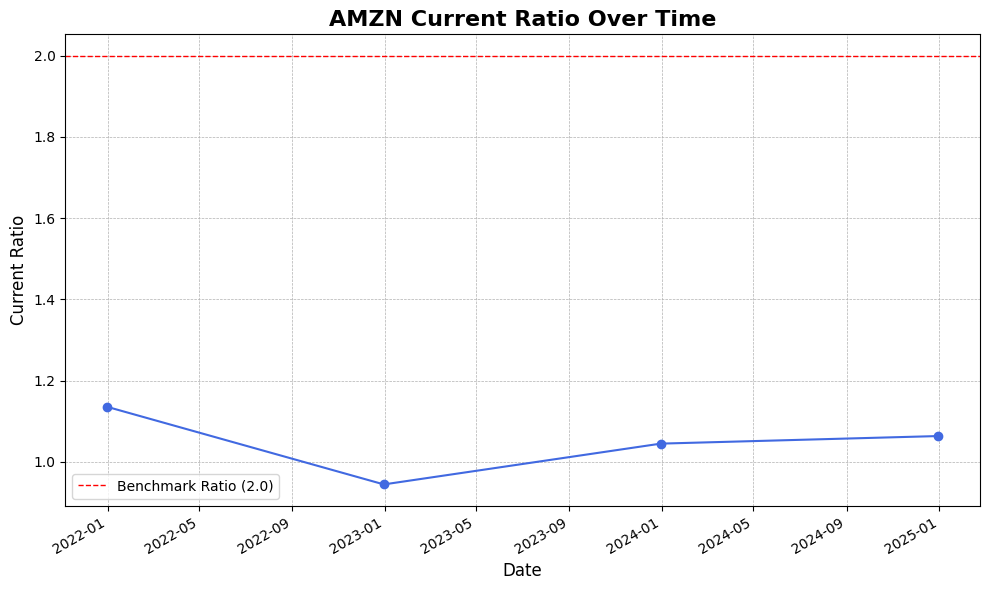

In [8]:

#plt.figure(figsize=(10, 6))
#plt.plot(df_balance_cleaned.index, df_balance_cleaned['Current Ratio'])
#plt.title(f'{symbol} Current Ratio Over Time')
#plt.xlabel('Date')
#plt.ylabel('Current Ratio')
#plt.grid(True)
#plt.show()

plt.figure(figsize=(10, 6))

# Ploting the 'Current Ratio' from the DataFrame
# The index of the DataFrame (dates) is used for the x-axis
plt.plot(df_balance_cleaned.index, df_balance_cleaned['Current Ratio'], marker='o', linestyle='-', color='royalblue')

# Adding a title to the plot, using the defined 'symbol'
plt.title(f'{symbol} Current Ratio Over Time', fontsize=16, fontweight='bold')

# Adding labels to the axes
plt.xlabel('Date', fontsize=12)
plt.ylabel('Current Ratio', fontsize=12)

# Adding a horizontal line for a common benchmark (e.g., a ratio of 2.0)
plt.axhline(y=2.0, color='red', linestyle='--', linewidth=1, label='Benchmark Ratio (2.0)')
plt.legend()

# Improving the date formatting on the x-axis
plt.gcf().autofmt_xdate()

# Adding a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding a tight layout to ensure everything fits
plt.tight_layout()

# Displaying the plot
plt.show()

#Checking the min and max points for annotation

In [9]:

df_balance_cleaned['Current Ratio'] = df_balance_cleaned['Current Ratio'].fillna(0)

print("Current Ratio series before idxmax/idxmin:")
print(df_balance_cleaned['Current Ratio'])
print("Is Current Ratio series empty?", df_balance_cleaned['Current Ratio'].empty)
print("Number of non-null values:", df_balance_cleaned['Current Ratio'].count())


max_ratio = df_balance_cleaned['Current Ratio'].max()
min_ratio = df_balance_cleaned['Current Ratio'].min()
max_date = df_balance_cleaned['Current Ratio'].idxmax()
min_date = df_balance_cleaned['Current Ratio'].idxmin()
avg_ratio = df_balance_cleaned['Current Ratio'].mean()
benchmark_ratio = 2.0

Current Ratio series before idxmax/idxmin:
asofDate
2020-12-31    0.000000
2021-12-31    1.135760
2022-12-31    0.944644
2023-12-31    1.045077
2024-12-31    1.063735
Name: Current Ratio, dtype: float64
Is Current Ratio series empty? False
Number of non-null values: 5


#Ploting the 4 quarter Moving Average of the Current Ratio.

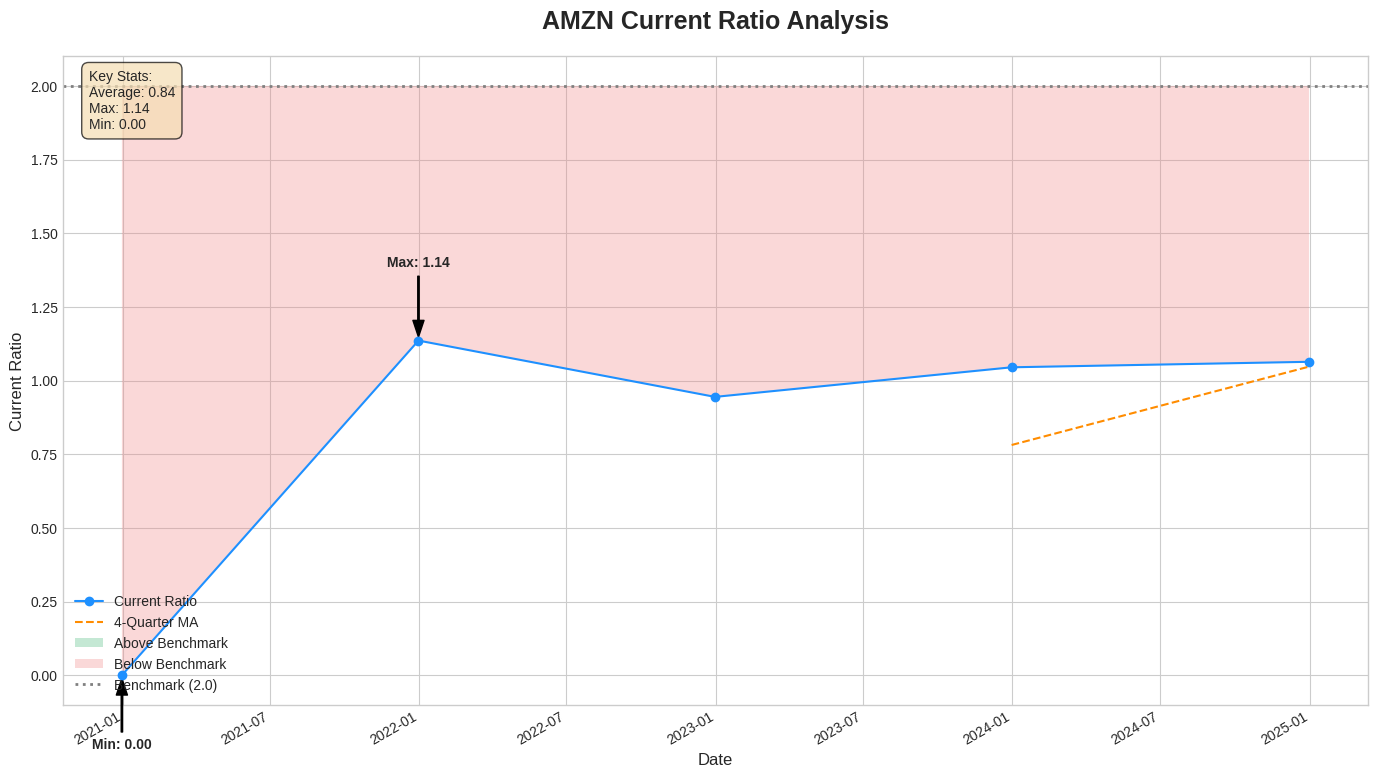

In [10]:
# Calculating the 4-quarter moving average of the 'Current Ratio'
df_balance_cleaned['MA_4_quarters'] = df_balance_cleaned['Current Ratio'].rolling(window=4).mean()

# Seting a visually appealing style
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))

# Ploting the actual Current Ratio and the Moving Average
plt.plot(df_balance_cleaned.index, df_balance_cleaned['Current Ratio'], marker='o', linestyle='-', color='dodgerblue', label='Current Ratio', zorder=5)
plt.plot(df_balance_cleaned.index, df_balance_cleaned['MA_4_quarters'], linestyle='--', color='darkorange', label='4-Quarter MA', zorder=5)

# --- Smart Visualization: Shade areas above/below benchmark ---
# This provides an immediate visual cue of performance against the benchmark.
plt.fill_between(df_balance_cleaned.index, df_balance_cleaned['Current Ratio'], benchmark_ratio,
                 where=(df_balance_cleaned['Current Ratio'] >= benchmark_ratio),
                 facecolor='mediumseagreen', alpha=0.3, interpolate=True, label='Above Benchmark')
plt.fill_between(df_balance_cleaned.index, df_balance_cleaned['Current Ratio'], benchmark_ratio,
                 where=(df_balance_cleaned['Current Ratio'] < benchmark_ratio),
                 facecolor='lightcoral', alpha=0.3, interpolate=True, label='Below Benchmark')

# Add the benchmark line
plt.axhline(y=benchmark_ratio, color='grey', linestyle=':', linewidth=2, label=f'Benchmark ({benchmark_ratio})')

# --- Smart Annotations ---
# Annotate the max and min points to draw attention to them.
plt.annotate(f'Max: {max_ratio:.2f}', xy=(max_date, max_ratio), xytext=(max_date, max_ratio + 0.25),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             ha='center', fontsize=10, fontweight='bold')
plt.annotate(f'Min: {min_ratio:.2f}', xy=(min_date, min_ratio), xytext=(min_date, min_ratio - 0.25),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             ha='center', fontsize=10, fontweight='bold')

# Add a text box with summary statistics for a quick overview
stats_text = (f"Key Stats:\n"
              f"Average: {avg_ratio:.2f}\n"
              f"Max: {max_ratio:.2f}\n"
              f"Min: {min_ratio:.2f}")
plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.7))

# --- Final Touches ---
# Add title and labels
plt.title(f'{symbol} Current Ratio Analysis', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Current Ratio', fontsize=12)

# Create a clear legend
plt.legend(loc='lower left')

# Improve the date formatting on the x-axis
plt.gcf().autofmt_xdate()

# Add a tight layout to ensure everything fits
plt.tight_layout(pad=1.5)

# Display the plot
plt.show()

#Ploting the min and max points.

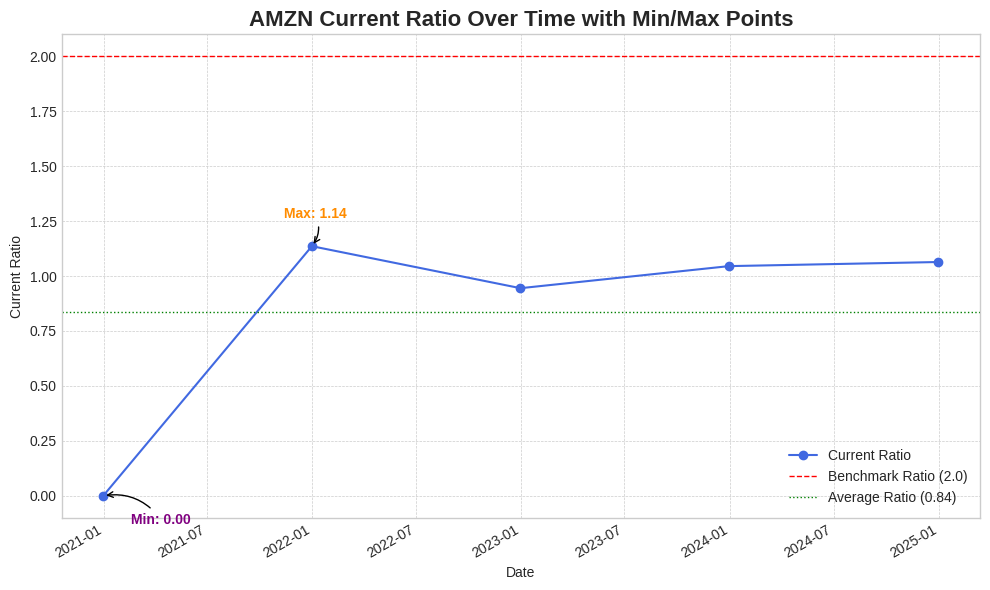

In [11]:

# Create the plot again to add annotations
plt.figure(figsize=(10, 6))

plt.plot(df_balance_cleaned.index, df_balance_cleaned['Current Ratio'], marker='o', linestyle='-', color='royalblue', label='Current Ratio')

plt.title(f'{symbol} Current Ratio Over Time with Min/Max Points', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=10)
plt.ylabel('Current Ratio', fontsize=10)

plt.axhline(y=benchmark_ratio, color='red', linestyle='--', linewidth=1, label=f'Benchmark Ratio ({benchmark_ratio})')
plt.axhline(y=avg_ratio, color='green', linestyle=':', linewidth=1, label=f'Average Ratio ({avg_ratio:.2f})')

# Annotate the maximum point
plt.annotate(f'Max: {max_ratio:.2f}',
             xy=(max_date, max_ratio),
             xytext=(-20, 20),
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.3'),
             fontsize=10, color='darkorange', fontweight='bold')

# Annotate the minimum point
plt.annotate(f'Min: {min_ratio:.2f}',
             xy=(min_date, min_ratio),
             xytext=(20, -20),
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.3'),
             fontsize=10, color='purple', fontweight='bold')


plt.legend()
plt.gcf().autofmt_xdate()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# find out the Quick Ratio

In [12]:
df_balance_cleaned["Quick Ratio"] = (df_balance_cleaned["CurrentAssets"] - df_balance_cleaned["Inventory"]) / df_balance_cleaned["CurrentLiabilities"]
display(df_balance_cleaned)

,currencyCode,AccountsPayable,AccountsReceivable,AccumulatedDepreciation,AdditionalPaidInCapital,AllowanceForDoubtfulAccountsReceivable,CapitalLeaseObligations,CapitalStock,CashAndCashEquivalents,CashCashEquivalentsAndShortTermInvestments,CommonStock,CommonStockEquity,ConstructionInProgress,CurrentAccruedExpenses,CurrentAssets,CurrentDeferredLiabilities,CurrentDeferredRevenue,CurrentLiabilities,FinishedGoods,GainsLossesNotAffectingRetainedEarnings,Goodwill,GoodwillAndOtherIntangibleAssets,GrossAccountsReceivable,GrossPPE,InventoriesAdjustmentsAllowances,Inventory,InvestedCapital,LandAndImprovements,LongTermCapitalLeaseObligation,LongTermDebt,LongTermDebtAndCapitalLeaseObligation,MachineryFurnitureEquipment,NetDebt,NetPPE,NetTangibleAssets,OrdinarySharesNumber,OtherEquityAdjustments,OtherIntangibleAssets,OtherInventories,OtherNonCurrentAssets,OtherNonCurrentLiabilities,OtherProperties,OtherShortTermInvestments,Payables,PayablesAndAccruedExpenses,PreferredStock,Properties,Receivables,RetainedEarnings,ShareIssued,StockholdersEquity,TangibleBookValue,TotalAssets,TotalCapitalization,TotalDebt,TotalEquityGrossMinorityInterest,TotalLiabilitiesNetMinorityInterest,TotalNonCurrentAssets,TotalNonCurrentLiabilitiesNetMinorityInterest,TreasurySharesNumber,TreasuryStock,WorkingCapital,Current Ratio,MA_4_quarters,Quick Ratio
asofDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-31,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379500e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.732400e+10,NaN,NaN,NaN,9.722400e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
2021-12-31,USD,7.866400e+10,3.289100e+10,-7.851900e+10,5.543700e+10,-1.100000e+09,6.765100e+10,106000000.0,3.622000e+10,9.604900e+10,106000000.0,1.382450e+11,2.489500e+10,5.177500e+10,1.615800e+11,1.182700e+10,1.182700e+10,1.422660e+11,3.264000e+10,-1.376000e+09,1.537100e+10,2.047800e+10,3.399100e+10,2.948820e+11,-2.600000e+09,3.264000e+10,1.869890e+11,8.110400e+10,6.765100e+10,4.874400e+10,1.163950e+11,1.286830e+11,1.252400e+10,2.163630e+11,1.177670e+11,1.018000e+10,-1.376000e+09,5.107000e+09,3.524000e+10,2.212800e+10,2.364300e+10,1.888830e+11,5.982900e+10,7.866400e+10,1.304390e+11,0.0,8.110400e+10,3.289100e+10,8.591500e+10,1.064000e+10,1.382450e+11,1.177670e+11,4.205490e+11,1.869890e+11,1.163950e+11,1.382450e+11,2.823040e+11,2.589690e+11,1.400380e+11,460000000.0,1.837000e+09,1.931400e+10,1.135760,NaN,0.906330
2022-12-31,USD,7.960000e+10,4.236000e+10,-9.701500e+10,7.506600e+10,-1.400000e+09,7.296800e+10,108000000.0,5.388800e+10,7.002600e+10,108000000.0,1.460430e+11,3.002000e+10,6.256600e+10,1.467910e+11,1.322700e+10,1.322700e+10,1.553930e+11,NaN,-4.487000e+09,2.028800e+10,2.638500e+10,4.376000e+10,3.498530e+11,-2.800000e+09,3.440500e+10,2.131930e+11,9.165000e+10,7.296800e+10,6.715000e+10,1.401180e+11,NaN,1.326200e+10,2.528380e+11,1.196580e+11,1.024200e+10,-4.487000e+09,6.097000e+09,3.720500e+10,3.666100e+10,2.112100e+10,2.281830e+11,1.613800e+10,7.960000e+10,1.421660e+11,0.0,9.165000e+10,4.236000e+10,8.319300e+10,1.075700e+10,1.460430e+11,1.196580e+11,4.626750e+11,2.131930e+11,1.401180e+11,1.460430e+11,3.166320e+11,3.158840e+11,1.612390e+11,515000000.0,7.837000e+09,-8.602000e+09,0.944644,NaN,0.723237
2023-12-31,USD,8.498100e+10,5.225300e+10,-1.201110e+11,9.902500e+10,-1.700000e+09,7.729700e+10,109000000.0,7.338700e+10,8.678000e+10,109000000.0,2.018750e+11,2.884000e+10,6.470900e+10,1.723510e+11,1.522700e+10,1.522700e+10,1.649170e+11,NaN,-3.040000e+09,2.278900e+10,3.047600e+10,5.395300e+10,3.968010e+11,-3.000000e+09,3.331800e+10,2.601890e+11,1.052930e+11,7.729700e+10,5.831400e+10,1.356110e+11,NaN,NaN,2.766900e+11,1.713990e+11,1.038300e+10,-3.040000e+09,7.687000e+09,3.631800e+10,4.833700e+10,2.545100e+10,2.626680e+11,1.339300e+10,8.498100e+10,1.496900e+11,0.0,1.052930e+11,5.225300e+10,1.136180e+11,1.089800e+10,2.018750e+11,1.713990e+11,5.278540e+11,2.60

#Ploting the Quick Ratio

<Axes: xlabel='asofDate'>

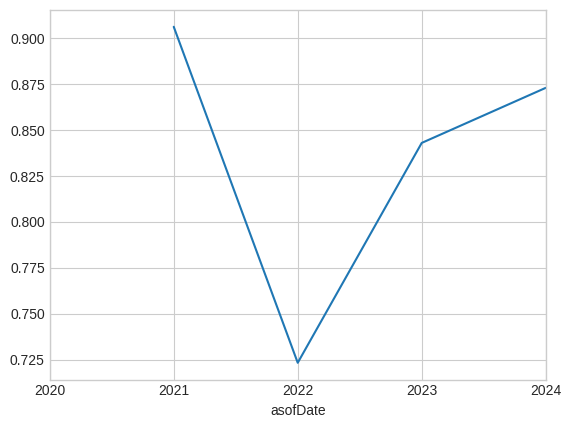

In [13]:
display(df_balance_cleaned["Quick Ratio"].plot())

# Find out the Debt to Equity Ratio

In [14]:
df_balance_cleaned["Debt to Equity Ratio"] = df_balance_cleaned["LongTermDebt"] / df_balance_cleaned["StockholdersEquity"]
display(df_balance_cleaned)
print(df_balance_cleaned.head())
#print("-" * 50)

,currencyCode,AccountsPayable,AccountsReceivable,AccumulatedDepreciation,AdditionalPaidInCapital,AllowanceForDoubtfulAccountsReceivable,CapitalLeaseObligations,CapitalStock,CashAndCashEquivalents,CashCashEquivalentsAndShortTermInvestments,CommonStock,CommonStockEquity,ConstructionInProgress,CurrentAccruedExpenses,CurrentAssets,CurrentDeferredLiabilities,CurrentDeferredRevenue,CurrentLiabilities,FinishedGoods,GainsLossesNotAffectingRetainedEarnings,Goodwill,GoodwillAndOtherIntangibleAssets,GrossAccountsReceivable,GrossPPE,InventoriesAdjustmentsAllowances,Inventory,InvestedCapital,LandAndImprovements,LongTermCapitalLeaseObligation,LongTermDebt,LongTermDebtAndCapitalLeaseObligation,MachineryFurnitureEquipment,NetDebt,NetPPE,NetTangibleAssets,OrdinarySharesNumber,OtherEquityAdjustments,OtherIntangibleAssets,OtherInventories,OtherNonCurrentAssets,OtherNonCurrentLiabilities,OtherProperties,OtherShortTermInvestments,Payables,PayablesAndAccruedExpenses,PreferredStock,Properties,Receivables,RetainedEarnings,ShareIssued,StockholdersEquity,TangibleBookValue,TotalAssets,TotalCapitalization,TotalDebt,TotalEquityGrossMinorityInterest,TotalLiabilitiesNetMinorityInterest,TotalNonCurrentAssets,TotalNonCurrentLiabilitiesNetMinorityInterest,TreasurySharesNumber,TreasuryStock,WorkingCapital,Current Ratio,MA_4_quarters,Quick Ratio,Debt to Equity Ratio
asofDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-31,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379500e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.732400e+10,NaN,NaN,NaN,9.722400e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
2021-12-31,USD,7.866400e+10,3.289100e+10,-7.851900e+10,5.543700e+10,-1.100000e+09,6.765100e+10,106000000.0,3.622000e+10,9.604900e+10,106000000.0,1.382450e+11,2.489500e+10,5.177500e+10,1.615800e+11,1.182700e+10,1.182700e+10,1.422660e+11,3.264000e+10,-1.376000e+09,1.537100e+10,2.047800e+10,3.399100e+10,2.948820e+11,-2.600000e+09,3.264000e+10,1.869890e+11,8.110400e+10,6.765100e+10,4.874400e+10,1.163950e+11,1.286830e+11,1.252400e+10,2.163630e+11,1.177670e+11,1.018000e+10,-1.376000e+09,5.107000e+09,3.524000e+10,2.212800e+10,2.364300e+10,1.888830e+11,5.982900e+10,7.866400e+10,1.304390e+11,0.0,8.110400e+10,3.289100e+10,8.591500e+10,1.064000e+10,1.382450e+11,1.177670e+11,4.205490e+11,1.869890e+11,1.163950e+11,1.382450e+11,2.823040e+11,2.589690e+11,1.400380e+11,460000000.0,1.837000e+09,1.931400e+10,1.135760,NaN,0.906330,0.352591
2022-12-31,USD,7.960000e+10,4.236000e+10,-9.701500e+10,7.506600e+10,-1.400000e+09,7.296800e+10,108000000.0,5.388800e+10,7.002600e+10,108000000.0,1.460430e+11,3.002000e+10,6.256600e+10,1.467910e+11,1.322700e+10,1.322700e+10,1.553930e+11,NaN,-4.487000e+09,2.028800e+10,2.638500e+10,4.376000e+10,3.498530e+11,-2.800000e+09,3.440500e+10,2.131930e+11,9.165000e+10,7.296800e+10,6.715000e+10,1.401180e+11,NaN,1.326200e+10,2.528380e+11,1.196580e+11,1.024200e+10,-4.487000e+09,6.097000e+09,3.720500e+10,3.666100e+10,2.112100e+10,2.281830e+11,1.613800e+10,7.960000e+10,1.421660e+11,0.0,9.165000e+10,4.236000e+10,8.319300e+10,1.075700e+10,1.460430e+11,1.196580e+11,4.626750e+11,2.131930e+11,1.401180e+11,1.460430e+11,3.166320e+11,3.158840e+11,1.612390e+11,515000000.0,7.837000e+09,-8.602000e+09,0.944644,NaN,0.723237,0.459796
2023-12-31,USD,8.498100e+10,5.225300e+10,-1.201110e+11,9.902500e+10,-1.700000e+09,7.729700e+10,109000000.0,7.338700e+10,8.678000e+10,109000000.0,2.018750e+11,2.884000e+10,6.470900e+10,1.723510e+11,1.522700e+10,1.522700e+10,1.649170e+11,NaN,-3.040000e+09,2.278900e+10,3.047600e+10,5.395300e+10,3.968010e+11,-3.000000e+09,3.331800e+10,2.601890e+11,1.052930e+11,7.729700e+10,5.831400e+10,1.356110e+11,NaN,NaN,2.766900e+11,1.713990e+11,1.038300e+10,-3.040000e+09,7.687000e+09,3.631800e+10,4.833700e+10,2.545100e+10,2.626680e+11,1.339300e+10,8.498100e+10,1.496900e+11,0.0,1.052930e+11,5.225300e+10,1.136180e+11,1.089800e+10

           currencyCode  AccountsPayable  AccountsReceivable  \
asofDate                                                       
2020-12-31          USD              NaN                 NaN   
2021-12-31          USD     7.866400e+10        3.289100e+10   
2022-12-31          USD     7.960000e+10        4.236000e+10   
2023-12-31          USD     8.498100e+10        5.225300e+10   
2024-12-31          USD     9.436300e+10        5.545100e+10   

            AccumulatedDepreciation  AdditionalPaidInCapital  \
asofDate                                                       
2020-12-31                      NaN                      NaN   
2021-12-31            -7.851900e+10             5.543700e+10   
2022-12-31            -9.701500e+10             7.506600e+10   
2023-12-31            -1.201110e+11             9.902500e+10   
2024-12-31            -1.413900e+11             1.208640e+11   

            AllowanceForDoubtfulAccountsReceivable  CapitalLeaseObligations  \
asofDate               

#Ploting the Debt to Equity Ratio

<Axes: xlabel='asofDate'>

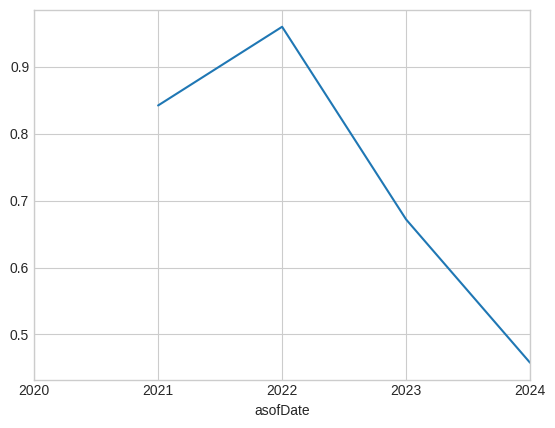

In [15]:
# Calculate Debt to Equity Ratio before plotting
df_balance_cleaned["Debt to Equity Ratio"] = df_balance_cleaned["TotalDebt"] / df_balance_cleaned["StockholdersEquity"]
display(df_balance_cleaned["Debt to Equity Ratio"].plot())

# Find out Total Debt and Stockholders Equity Ratio

In [16]:
df_balance_cleaned["Debt to Equity Ratio"] = df_balance_cleaned["TotalDebt"] / df_balance_cleaned["StockholdersEquity"]
# Now perform dropna after all calculations
#df_balance_cleaned = df_balance_cleaned.dropna()
display(df_balance_cleaned)

,currencyCode,AccountsPayable,AccountsReceivable,AccumulatedDepreciation,AdditionalPaidInCapital,AllowanceForDoubtfulAccountsReceivable,CapitalLeaseObligations,CapitalStock,CashAndCashEquivalents,CashCashEquivalentsAndShortTermInvestments,CommonStock,CommonStockEquity,ConstructionInProgress,CurrentAccruedExpenses,CurrentAssets,CurrentDeferredLiabilities,CurrentDeferredRevenue,CurrentLiabilities,FinishedGoods,GainsLossesNotAffectingRetainedEarnings,Goodwill,GoodwillAndOtherIntangibleAssets,GrossAccountsReceivable,GrossPPE,InventoriesAdjustmentsAllowances,Inventory,InvestedCapital,LandAndImprovements,LongTermCapitalLeaseObligation,LongTermDebt,LongTermDebtAndCapitalLeaseObligation,MachineryFurnitureEquipment,NetDebt,NetPPE,NetTangibleAssets,OrdinarySharesNumber,OtherEquityAdjustments,OtherIntangibleAssets,OtherInventories,OtherNonCurrentAssets,OtherNonCurrentLiabilities,OtherProperties,OtherShortTermInvestments,Payables,PayablesAndAccruedExpenses,PreferredStock,Properties,Receivables,RetainedEarnings,ShareIssued,StockholdersEquity,TangibleBookValue,TotalAssets,TotalCapitalization,TotalDebt,TotalEquityGrossMinorityInterest,TotalLiabilitiesNetMinorityInterest,TotalNonCurrentAssets,TotalNonCurrentLiabilitiesNetMinorityInterest,TreasurySharesNumber,TreasuryStock,WorkingCapital,Current Ratio,MA_4_quarters,Quick Ratio,Debt to Equity Ratio
asofDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-31,USD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379500e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.732400e+10,NaN,NaN,NaN,9.722400e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
2021-12-31,USD,7.866400e+10,3.289100e+10,-7.851900e+10,5.543700e+10,-1.100000e+09,6.765100e+10,106000000.0,3.622000e+10,9.604900e+10,106000000.0,1.382450e+11,2.489500e+10,5.177500e+10,1.615800e+11,1.182700e+10,1.182700e+10,1.422660e+11,3.264000e+10,-1.376000e+09,1.537100e+10,2.047800e+10,3.399100e+10,2.948820e+11,-2.600000e+09,3.264000e+10,1.869890e+11,8.110400e+10,6.765100e+10,4.874400e+10,1.163950e+11,1.286830e+11,1.252400e+10,2.163630e+11,1.177670e+11,1.018000e+10,-1.376000e+09,5.107000e+09,3.524000e+10,2.212800e+10,2.364300e+10,1.888830e+11,5.982900e+10,7.866400e+10,1.304390e+11,0.0,8.110400e+10,3.289100e+10,8.591500e+10,1.064000e+10,1.382450e+11,1.177670e+11,4.205490e+11,1.869890e+11,1.163950e+11,1.382450e+11,2.823040e+11,2.589690e+11,1.400380e+11,460000000.0,1.837000e+09,1.931400e+10,1.135760,NaN,0.906330,0.841947
2022-12-31,USD,7.960000e+10,4.236000e+10,-9.701500e+10,7.506600e+10,-1.400000e+09,7.296800e+10,108000000.0,5.388800e+10,7.002600e+10,108000000.0,1.460430e+11,3.002000e+10,6.256600e+10,1.467910e+11,1.322700e+10,1.322700e+10,1.553930e+11,NaN,-4.487000e+09,2.028800e+10,2.638500e+10,4.376000e+10,3.498530e+11,-2.800000e+09,3.440500e+10,2.131930e+11,9.165000e+10,7.296800e+10,6.715000e+10,1.401180e+11,NaN,1.326200e+10,2.528380e+11,1.196580e+11,1.024200e+10,-4.487000e+09,6.097000e+09,3.720500e+10,3.666100e+10,2.112100e+10,2.281830e+11,1.613800e+10,7.960000e+10,1.421660e+11,0.0,9.165000e+10,4.236000e+10,8.319300e+10,1.075700e+10,1.460430e+11,1.196580e+11,4.626750e+11,2.131930e+11,1.401180e+11,1.460430e+11,3.166320e+11,3.158840e+11,1.612390e+11,515000000.0,7.837000e+09,-8.602000e+09,0.944644,NaN,0.723237,0.959430
2023-12-31,USD,8.498100e+10,5.225300e+10,-1.201110e+11,9.902500e+10,-1.700000e+09,7.729700e+10,109000000.0,7.338700e+10,8.678000e+10,109000000.0,2.018750e+11,2.884000e+10,6.470900e+10,1.723510e+11,1.522700e+10,1.522700e+10,1.649170e+11,NaN,-3.040000e+09,2.278900e+10,3.047600e+10,5.395300e+10,3.968010e+11,-3.000000e+09,3.331800e+10,2.601890e+11,1.052930e+11,7.729700e+10,5.831400e+10,1.356110e+11,NaN,NaN,2.766900e+11,1.713990e+11,1.038300e+10,-3.040000e+09,7.687000e+09,3.631800e+10,4.833700e+10,2.545100e+10,2.626680e+11,1.339300e+10,8.498100e+10,1.496900e+11,0.0,1.052930e+11,5.225300e+10,1.136180e+11,1.089800e+10

#Ploting the Total Debt and Stockholders Equity

<Axes: xlabel='asofDate'>

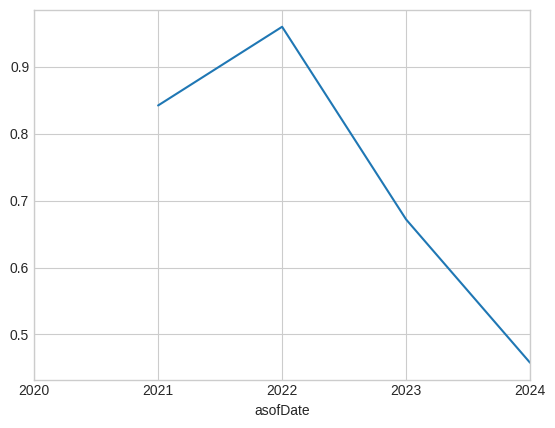

In [17]:
display(df_balance_cleaned["Debt to Equity Ratio"].plot())

#Find out the Current Ratio Change

In [18]:
current_ratio_chg=df_balance_cleaned["Current Ratio"].iloc[-1]-df_balance_cleaned["Current Ratio"].iloc[0]
display(current_ratio_chg)

np.float64(1.063734806137178)

#Ploting the Current Ratio Change

<Axes: xlabel='asofDate'>

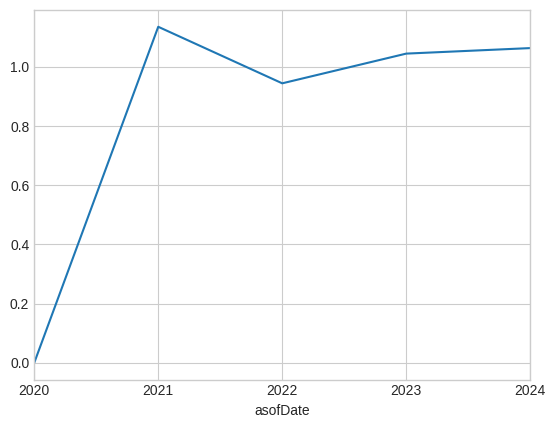

In [19]:
display(df_balance_cleaned["Current Ratio"].plot())


# Find out the major stockholders

In [20]:

print("Major StockHolders:")
stock.major_holders

Major StockHolders:


{'AMZN': {'maxAge': 1,
  'insidersPercentHeld': 0.08721,
  'institutionsPercentHeld': 0.65449,
  'institutionsFloatPercentHeld': 0.71702003,
  'institutionsCount': 6969}}

#PLoting Major Stockholders

/tmp/ipython-input-21-2971580140.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Organization', y='Percentage Held', data=plot_data, palette='viridis')


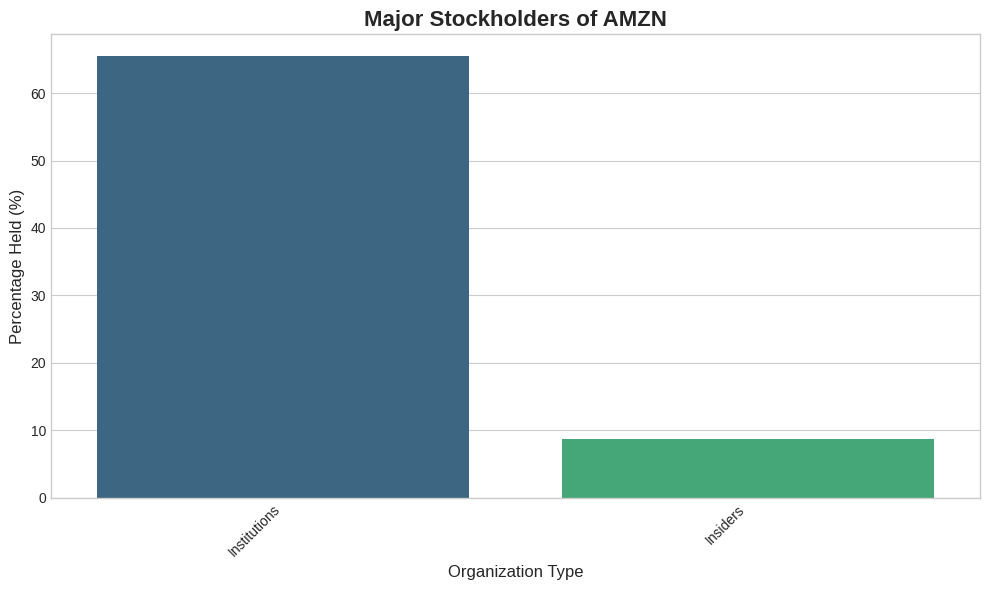

In [21]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Extract the major holders data
major_holders_data = stock.major_holders

if major_holders_data and 'AMZN' in major_holders_data:
  # The data is nested under the ticker symbol, so we access it like this
  major_holders_info = major_holders_data['AMZN']

  # Create a DataFrame from the relevant information
  # We need to restructure the data for plotting
  plot_data = pd.DataFrame({
      'Organization': ['Insiders', 'Institutions'],
      'Percentage Held': [major_holders_info.get('insidersPercentHeld', 0) * 100,
                          major_holders_info.get('institutionsPercentHeld', 0) * 100]
  })


  if not plot_data.empty:
    # Sort by percentage held
    plot_data = plot_data.sort_values(by='Percentage Held', ascending=False)

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Organization', y='Percentage Held', data=plot_data, palette='viridis')

    plt.title(f'Major Stockholders of {symbol}', fontsize=16, fontweight='bold')
    plt.xlabel('Organization Type', fontsize=12)
    plt.ylabel('Percentage Held (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right') # Rotate labels for readability
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()
  else:
    print("No major stockholders data available for plotting.")
else:
  print("Could not retrieve major stockholders data.")

#Find out the earmings

In [22]:

print("Earnings:")
stock.earnings

Earnings:


{'AMZN': {'maxAge': 86400,
  'earningsChart': {'quarterly': [{'date': '2Q2024',
     'actual': 1.26,
     'estimate': 1.02503},
    {'date': '3Q2024', 'actual': 1.43, 'estimate': 1.14242},
    {'date': '4Q2024', 'actual': 1.86, 'estimate': 1.48369},
    {'date': '1Q2025', 'actual': 1.59, 'estimate': 1.358}],
   'currentQuarterEstimate': 1.30774,
   'currentQuarterEstimateDate': '2Q',
   'currentQuarterEstimateYear': 2025,
   'earningsDate': ['2025-07-30 20:00:S', '2025-08-04 20:00:S'],
   'isEarningsDateEstimate': True},
  'financialsChart': {'yearly': [{'date': 2021,
     'revenue': 469822000000,
     'earnings': 33364000000},
    {'date': 2022, 'revenue': 513983000000, 'earnings': -2722000000},
    {'date': 2023, 'revenue': 574785000000, 'earnings': 30425000000},
    {'date': 2024, 'revenue': 637959000000, 'earnings': 59248000000}],
   'quarterly': [{'date': '2Q2024',
     'revenue': 147977000000,
     'earnings': 13485000000},
    {'date': '3Q2024', 'revenue': 158877000000, 'earning

#Creating a plot to show the quarterly earnings

/tmp/ipython-input-23-4165329544.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  earnings_df['date'] = pd.to_datetime(earnings_df['date'])


<Axes: title={'center': 'AMZN Quarterly Earnings'}, xlabel='date'>

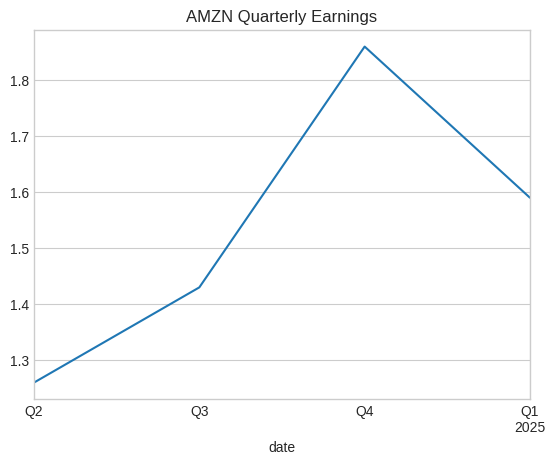

In [23]:

# Access the quarterly earnings data
earnings_data = stock.earnings['AMZN']['earningsChart']['quarterly']
earnings_df = pd.DataFrame(earnings_data)

# Convert the 'date' column to datetime objects
earnings_df['date'] = pd.to_datetime(earnings_df['date'])

# Set the 'date' column as the index
earnings_df = earnings_df.set_index('date')

# Plot the 'actual' earnings
display(earnings_df['actual'].plot(title=f'{symbol} Quarterly Earnings'))

#Creating a plot to show the Yearly Earning

<Axes: title={'center': 'AMZN Yearly Earnings'}, xlabel='date'>

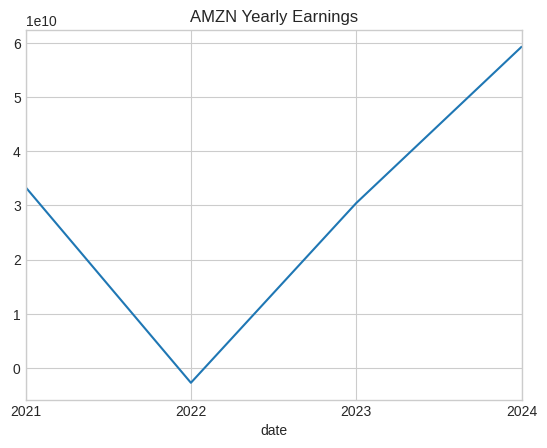

In [24]:

# Access the annual earnings data
earnings_data = stock.earnings['AMZN']['financialsChart']['yearly']
earnings_df = pd.DataFrame(earnings_data)

# Convert the 'date' column to datetime objects
earnings_df['date'] = pd.to_datetime(earnings_df['date'], format='%Y')

# Set the 'date' column as the index
earnings_df = earnings_df.set_index('date')

# Plot the 'earnings'
display(earnings_df['earnings'].plot(title=f'{symbol} Yearly Earnings'))

#Recommendations based on Grades

In [25]:

def give_recommendation(df):
  """
  Gives recommendations based on grades of financial ratios.

  Args:
    df: DataFrame containing financial ratios over time.

  Returns:
    A string with recommendations.
  """
  recommendations = []

  # Current Ratio recommendation
  current_ratio_avg = df["Current Ratio"].mean()
  if current_ratio_avg > 2:
    recommendations.append("Current Ratio is strong (above 2), indicating good short-term liquidity.")
  elif current_ratio_avg > 1:
    recommendations.append("Current Ratio is acceptable (between 1 and 2), indicating sufficient short-term liquidity.")
  else:
    recommendations.append("Current Ratio is weak (below 1), suggesting potential short-term liquidity issues.")

  # Quick Ratio recommendation
  quick_ratio_avg = df["Quick Ratio"].mean()
  if quick_ratio_avg > 1:
    recommendations.append("Quick Ratio is strong (above 1), indicating good ability to meet short-term obligations without relying on inventory.")
  else:
    recommendations.append("Quick Ratio is weak (below 1), suggesting potential difficulty meeting short-term obligations without selling inventory.")

  # Debt to Equity Ratio recommendation
  debt_equity_ratio_avg = df["Debt to Equity Ratio"].mean()
  if debt_equity_ratio_avg < 1:
    recommendations.append("Debt to Equity Ratio is strong (below 1), indicating low financial leverage.")
  elif debt_equity_ratio_avg < 2:
    recommendations.append("Debt to Equity Ratio is acceptable (between 1 and 2), indicating moderate financial leverage.")
  else:
    recommendations.append("Debt to Equity Ratio is weak (above 2), suggesting high financial leverage and potential risk.")

  # Current Ratio Change recommendation
  current_ratio_chg = df["Current Ratio"].iloc[-1] - df["Current Ratio"].iloc[0]
  if current_ratio_chg > 0:
      recommendations.append("Current Ratio has improved over time.")
  elif current_ratio_chg < 0:
      recommendations.append("Current Ratio has decreased over time.")
  else:
      recommendations.append("Current Ratio has remained stable over time.")


  return "\n".join(recommendations)

# Assuming df_balance is your DataFrame containing the calculated ratios
recommendations = give_recommendation(df_balance_cleaned)
print("Recommendations based on grades:")
recommendations


Recommendations based on grades:


'Current Ratio is weak (below 1), suggesting potential short-term liquidity issues.\nQuick Ratio is weak (below 1), suggesting potential difficulty meeting short-term obligations without selling inventory.\nDebt to Equity Ratio is strong (below 1), indicating low financial leverage.\nCurrent Ratio has improved over time.'

#Overall Recommendations

In [26]:


if current_ratio_chg > 0:
  print("Current Ratio has improved. This indicates better short-term liquidity.")
else:
  print("Current Ratio has decreased. This might suggest potential short-term liquidity issues.")

# You can add more recommendations based on other calculated ratios and major holders data
# For example:
# if df_balance["Debt to Equity Ratio"].iloc[-1] < df_balance["Debt to Equity Ratio"].iloc[0]:
#   print("Debt to Equity Ratio has decreased, which is generally a positive sign.")
# else:
#   print("Debt to Equity Ratio has increased, which might warrant further investigation.")

# Consider major holders data in recommendations if relevant to your analysis.


Current Ratio has improved. This indicates better short-term liquidity.
